In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Sequential
import os

Using TensorFlow backend.


In [2]:
import numpy as np
from keras.models import Sequential
import os
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import *
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.layers import Input

In [3]:
try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
  print('TPU not found')

Found TPU at: grpc://10.111.148.34:8470


Below code does not work


```
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
```

Mount the Google Drive to obtain dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
train_path = "/content/drive/My Drive/Eye Disease Research/train"
test_path = "/content/drive/My Drive/Eye Disease Research/test"

Read the image files and split them into train, test and validation

In [9]:
imgdata = ImageDataGenerator( rescale=1.0/255.0, validation_split=0.20)
train_batches = imgdata.flow_from_directory(train_path,class_mode='categorical', subset='training', target_size=(768, 496) ,
                                            classes = ['CNV','DME','DRUSEN','NORMAL'], batch_size = 32)
test_batches = imgdata.flow_from_directory(test_path, target_size=(768, 496) ,class_mode='categorical',
                                           classes = ['CNV','DME','DRUSEN','NORMAL'], batch_size = 32)
valid_batches = imgdata.flow_from_directory(train_path, subset='validation', target_size=(768, 496) ,class_mode='categorical',
                                            classes = ['CNV','DME','DRUSEN','NORMAL'], batch_size = 32)


Found 66824 images belonging to 4 classes.
Found 1001 images belonging to 4 classes.
Found 16705 images belonging to 4 classes.


In [10]:

tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)


Running on TPU  ['10.111.148.34:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.111.148.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.111.148.34:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [11]:
def model_create():
  vgg16_model = VGG16(input_tensor=Input(shape=(768, 496, 3)),input_shape=(768,496,3), include_top = False)
  model= Sequential()
  model.add(vgg16_model)
 
  #Make the vgg16's layers non-trainable
  for layer in model.layers:
    layer.trainable = False
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  return model

In [12]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train_batches.classes), 
                                                  train_batches.classes)
class_weights

array([0.56128209, 1.84007049, 2.42080858, 0.79250474])

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>0.8850):
        print("\n Reached 88.50% accuracy so cancelling training!")
        self.model.stop_training = True

In [14]:
lr = [0.0005]
callbacks = myCallback()
for i in lr:
  print("Learning Rate: " + str(i))
  with strategy.scope():
    model = model_create()
    model.compile(Adam(learning_rate=i), loss='categorical_crossentropy', 
              metrics=['accuracy', keras.metrics.AUC()])
    
  history = model.fit(train_batches, steps_per_epoch = 512, epochs = 14, 
            validation_data = valid_batches, validation_steps = 128, 
            class_weight = class_weights, shuffle = True, callbacks = [callbacks])

model.save("/content/drive/My Drive/Eye Disease Research/model_vgg16-07292020-ver1.01.h5")
print("Saved model to disk")
model_json = model.to_json()
with open("/content/drive/My Drive/Eye Disease Research/model_vgg16_jsn-07292020-ver1.01.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Eye Disease Research/model_vgg16_wt-07292020-ver1.01.h5")
print("Saved model to disk")
  

Learning Rate: 0.0005
58892288/58889256 [==============================] - 1s 0us/step
Epoch 1/14
512/512 [==============================] - 4381s 9s/step - loss: 0.8947 - accuracy: 0.7296 - auc: 0.8509 - val_loss: 0.9545 - val_accuracy: 0.7842 - val_auc: 0.9064
Epoch 2/14
512/512 [==============================] - 4266s 8s/step - loss: 0.4861 - accuracy: 0.8284 - auc: 0.9217 - val_loss: 0.3933 - val_accuracy: 0.7795 - val_auc: 0.9332
Epoch 3/14
512/512 [==============================] - 4232s 8s/step - loss: 0.4614 - accuracy: 0.8389 - auc: 0.9387 - val_loss: 0.3108 - val_accuracy: 0.8699 - val_auc: 0.9441
Epoch 4/14
512/512 [==============================] - 4253s 8s/step - loss: 0.4532 - accuracy: 0.8407 - auc: 0.9477 - val_loss: 0.4159 - val_accuracy: 0.8359 - val_auc: 0.9503
Epoch 5/14
512/512 [==============================] - 3202s 6s/step - loss: 0.3685 - accuracy: 0.8661 - auc: 0.9528 - val_loss: 0.3711 - val_accuracy: 0.8276 - val_auc: 0.9553
Epoch 6/14
512/512 [=============

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Using Training and Validation Data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valididation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Using Training and Validation Data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for AUC
plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('AUC Using Training and Validation Data')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
#Not needed
'''hist = model.fit(train_batches, steps_per_epoch = 512, epochs = 2, 
            validation_data = valid_batches, validation_steps = 128, 
            class_weight = class_weights, shuffle = True)

print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy Using Training and Validation Data for the Additional 2 Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valididation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss Using Training and Validation Data for the Additional 2 Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for AUC
plt.plot(hist.history['auc_1'])
plt.plot(hist.history['val_auc_1'])
plt.title('AUC Using Training and Validation Data for the Additional 2 Epochs')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()'''

Epoch 1/3
523/523 [==============================] - 2860s 5s/step - loss: 0.3364 - accuracy: 0.8795 - auc: 0.9633 - val_loss: 0.4007 - val_accuracy: 0.8941 - val_auc: 0.9644
Epoch 2/3
523/523 [==============================] - 2832s 5s/step - loss: 0.2333 - accuracy: 0.9178 - auc: 0.9659 - val_loss: 0.3774 - val_accuracy: 0.9021 - val_auc: 0.9674

 Reached 88.00% accuracy so cancelling training!
Saved model to disk
Saved model to disk
dict_keys(['val_loss', 'val_accuracy', 'val_auc', 'loss', 'accuracy', 'auc'])


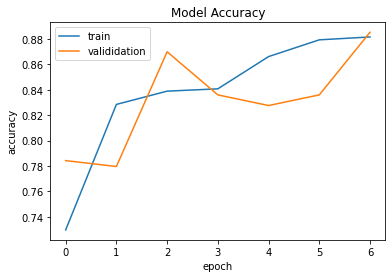

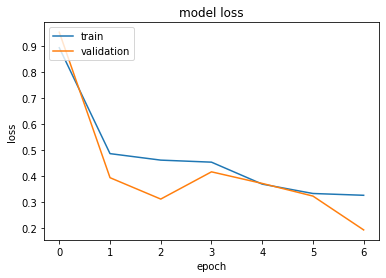

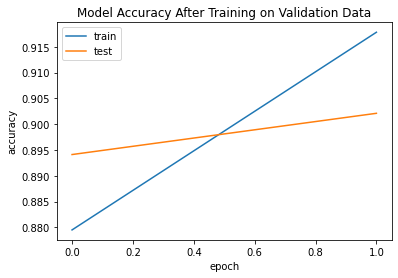

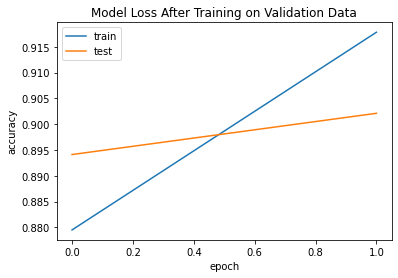

In [15]:
class myCallback1(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>0.9400):
        print("\n Reached 94.0% accuracy so cancelling training!")
        self.model.stop_training = True

callback1 = myCallback1()
history_1 = model.fit(valid_batches, steps_per_epoch = 523, epochs = 4, 
            validation_data = test_batches, validation_steps = 32, 
            class_weight = class_weights, shuffle = True, callbacks = [callback1])
model.save("/content/drive/My Drive/Eye Disease Research/model_vgg16-07302020-ver2.02.h5")
print("Saved model to disk")
model_json = model.to_json()
with open("/content/drive/My Drive/Eye Disease Research/model_vgg16_jsn-07302020-ver2.02.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Eye Disease Research/model_vgg16_wt-07302020-ver2.02.h5")
print("Saved model to disk")


In [ ]:
#
print(history_1.history.keys())
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy After Training on Validation Data and Testing on Test data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss After Training on Validation Data and Testing on Test data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for AUC
plt.plot(history_1.history['auc_1'])
plt.plot(history_1.history['val_auc_1'])
plt.title('AUC Using Validation and Test Data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()